In [67]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [2]:
events=pd.read_json(r'C:\Users\ATHARAVA SHUKLA\Desktop\study\Football\wyscout data 17-18\events_England.json')

In [4]:
passes = events.loc[events['eventName']=='Pass']

In [10]:
m = len(passes)
is_accurate = np.zeros(m)

In [11]:
tags = passes.tags

In [20]:
for i in range(len(tags)):
        for j in range(len(tags[i])):
            if tags[i][j]['id']==1801:
                is_accurate[i]=1

In [22]:
passes['is_accurate']=is_accurate

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
del passes['tags']
del passes['eventId']
del passes['subEventName']
del passes['eventName']
del passes['eventSec']
del passes['subEventId']

In [50]:
positions=np.asarray(passes['positions'])
x_coord1 = np.zeros(m)
y_coord1 = np.zeros(m)
x_coord2 = np.zeros(m)
y_coord2 = np.zeros(m)
for i in range(m):
    for j in range(2):
        if j==0: 
            x_coord1[i]=positions[i][j]['x']*1.05
            y_coord1[i]=positions[i][j]['y']*0.68
        else:
            x_coord2[i]=positions[i][j]['x']*1.05
            y_coord2[i]=positions[i][j]['y']*0.68

In [52]:
passes['x1']=x_coord1
passes['x2']=x_coord2
passes['y1']=y_coord1
passes['y2']=y_coord2




F:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [54]:
del passes['positions']

In [56]:
passes.index = np.arange(0,len(passes),1)

In [57]:
passes

,playerId,matchId,teamId,matchPeriod,id,is_accurate,x1,x2,y1,y2
0,25413,2499719,1609,1H,177959171,1.0,51.45,32.55,33.32,53.04
1,370224,2499719,1609,1H,177959172,1.0,32.55,53.55,53.04,51.00
2,3319,2499719,1609,1H,177959173,1.0,53.55,36.75,51.00,48.28
3,120339,2499719,1609,1H,177959174,1.0,36.75,43.05,48.28,64.60
4,167145,2499719,1609,1H,177959175,1.0,43.05,75.60,64.60,59.84
...,...,...,...,...,...,...,...,...,...,...
328652,8313,2500098,1633,2H,251596219,1.0,68.25,64.05,42.84,65.28
328653,379209,2500098,1633,2H,251596221,1.0,64.05,42.00,65.28,57.80
328654,8561,2500098,1633,2H,251596225,1.0,61.95,55.65,47.60,60.52
328655,20620,2500098,1633,2H,251596226,1.0,55.65,103.95,60.52,48.96


In [58]:
def calculate_distance(x1,x2,y1,y2):
    distance = np.sqrt((x2-x1)**2 + (y2-y1)**2)
    return distance

In [59]:
distance = np.zeros(m)
for i in range(m):
    distance[i] = calculate_distance(passes['x1'][i],passes['x2'][i],passes['y1'][i],passes['y2'][i])

In [61]:
distance = np.around(distance,decimals=2)

In [62]:
passes['distance']=distance

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [104]:
passes = passes.drop(passes.loc[(passes['x2']==0) & (passes['y2']==0)].index)

In [111]:
passes = passes.drop(passes.loc[(passes['x2']==105) & (passes['y2']==68)].index)

In [112]:
X = passes[['x1','x2','y1','y2','distance']]
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [113]:
km = KMeans(n_clusters=50)
km = km.fit(X_scaled)

In [114]:
km.inertia_/len(passes)

0.6245940034020031

In [115]:
clusters = km.fit_predict(X_scaled)

In [116]:
passes['clusters'] = clusters

In [117]:
passes.to_csv('passes_clusters.csv',index = False)

In [119]:
passes = passes.sample(frac=1)

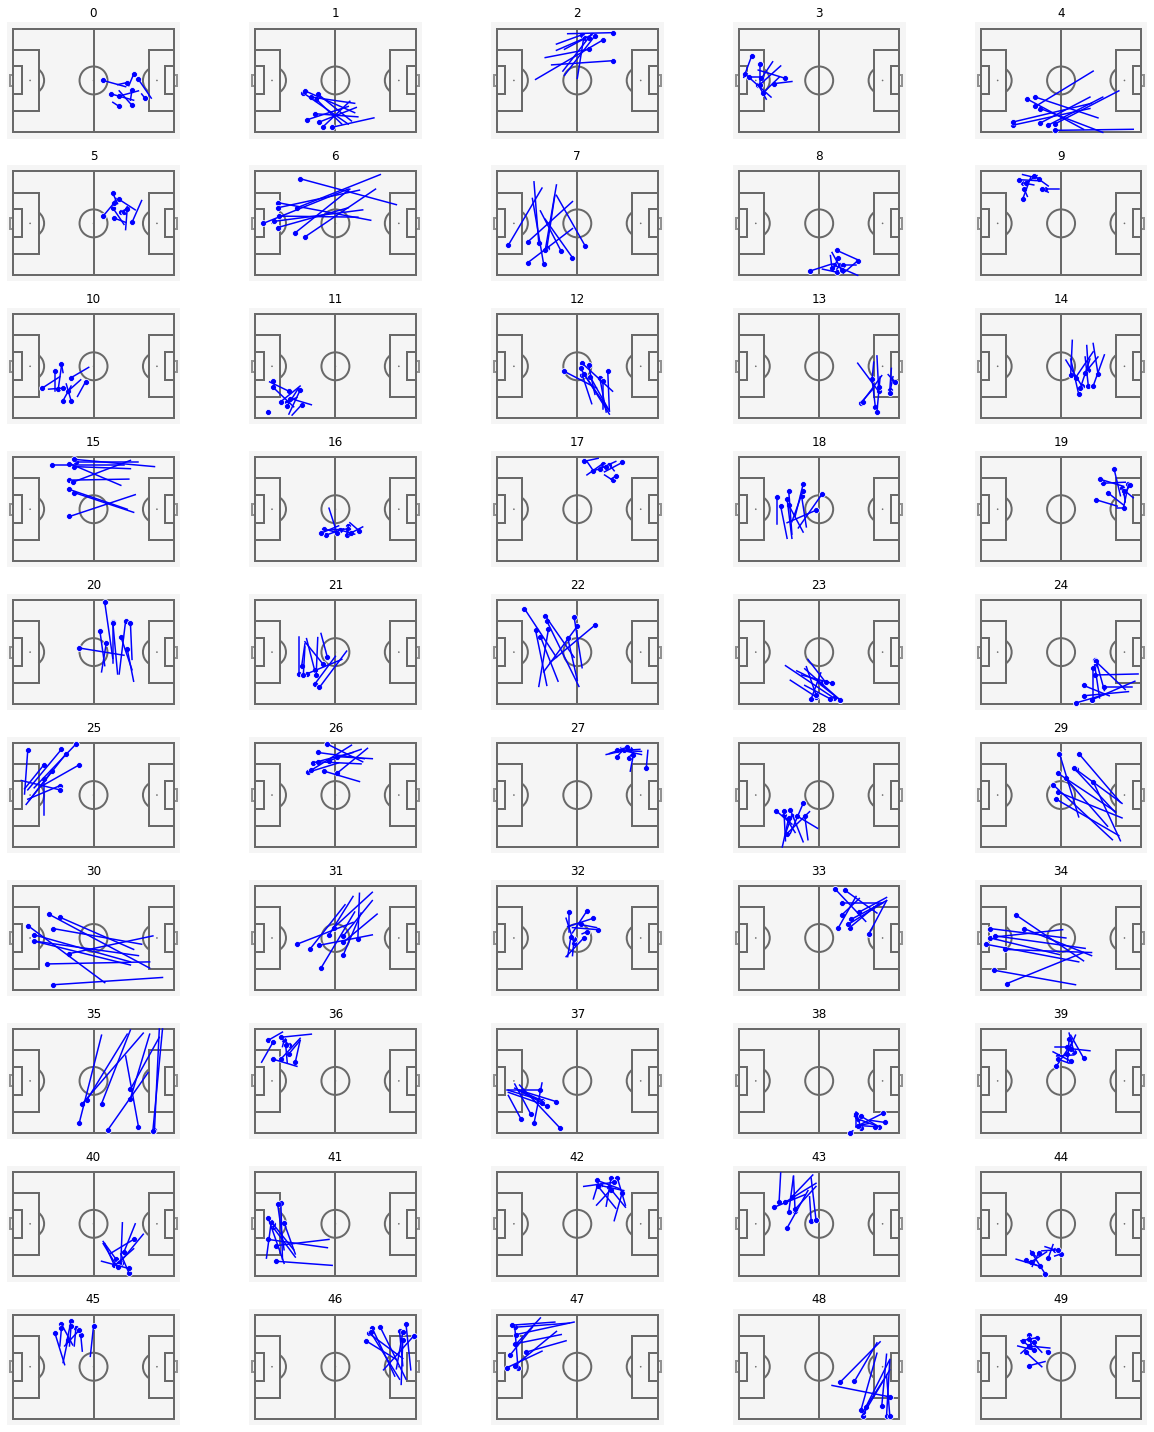

In [145]:
from mplsoccer import Pitch
pitch = Pitch(pitch_type='custom',half=False, goal_type='box', pitch_color='#f5f5f5', line_color='#696969' ,linewidth=2,pitch_length=105, pitch_width=68, constrained_layout=True)
fig, axs = pitch.draw(nrows=10, ncols=5, figsize=(20,20))
for i in range(10):
    for j in range(5):
        cluster_analysis = passes.loc[passes['clusters']==(5*i + j)][:10]
        cluster_analysis.index = np.arange(0,10,1)
        axs[i,j].invert_yaxis()
        for k in range(len(cluster_analysis)):
                axs[i,j].plot([cluster_analysis['x1'][k],cluster_analysis['x2'][k]],[cluster_analysis['y1'][k],cluster_analysis['y2'][k]], color='blue')
        
        sns.scatterplot(data=cluster_analysis,x='x1',y='y1',color='blue',ax=axs[i,j])
        axs[i,j].set_title(str((5*i+j)))
plt.savefig('pass_clusters.png')

## Over and Under Represented Passes

In [159]:
cluster_count  = np.asarray(passes.groupby(['clusters']).size())

In [162]:
cluster_count = cluster_count.reshape(-1,1)

In [163]:
scaler = preprocessing.StandardScaler().fit(cluster_count)
cluster_scaled = scaler.transform(cluster_count)

In [167]:
cluster_scaled = cluster_scaled.reshape(50,)

In [172]:
cluster_df  = pd.DataFrame(cluster_scaled,columns=['z-score'])

In [176]:
over_index=cluster_df.loc[cluster_df['z-score']>1.5].index

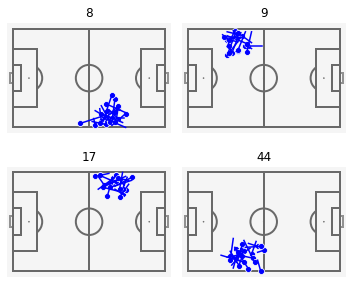

In [186]:
from mplsoccer import Pitch
pitch = Pitch(pitch_type='custom',half=False, goal_type='box', pitch_color='#f5f5f5', line_color='#696969' ,linewidth=2,pitch_length=105, pitch_width=68, constrained_layout=True)
fig, axs = pitch.draw(nrows=2, ncols=2, figsize=(5,5))
for i in range(2):
    for j in range(2):
        cluster_analysis = passes.loc[passes['clusters']==over_index[(2*i+j)]][:20]
        cluster_analysis.index = np.arange(0,20,1)
        axs[i,j].invert_yaxis()
        for k in range(len(cluster_analysis)):
                axs[i,j].plot([cluster_analysis['x1'][k],cluster_analysis['x2'][k]],[cluster_analysis['y1'][k],cluster_analysis['y2'][k]], color='blue')
        
        sns.scatterplot(data=cluster_analysis,x='x1',y='y1',color='blue',ax=axs[i,j])
        axs[i,j].set_title(str(over_index[(2*i+j)]))
plt.savefig('over_represented.png')

In [187]:
under_index=cluster_df.loc[cluster_df['z-score']<-1.5].index

In [188]:
under_index

Int64Index([30, 35], dtype='int64')

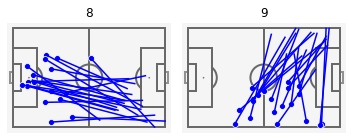

In [192]:
from mplsoccer import Pitch
pitch = Pitch(pitch_type='custom',half=False, goal_type='box', pitch_color='#f5f5f5', line_color='#696969' ,linewidth=2,pitch_length=105, pitch_width=68, constrained_layout=True)
fig, axs = pitch.draw(nrows=1, ncols=2, figsize=(5,5))
for i in range(2):
        cluster_analysis = passes.loc[passes['clusters']==under_index[i]][:20]
        cluster_analysis.index = np.arange(0,20,1)
        axs[i].invert_yaxis()
        for k in range(len(cluster_analysis)):
                axs[i].plot([cluster_analysis['x1'][k],cluster_analysis['x2'][k]],[cluster_analysis['y1'][k],cluster_analysis['y2'][k]], color='blue')
        
        sns.scatterplot(data=cluster_analysis,x='x1',y='y1',color='blue',ax=axs[i])
        axs[i].set_title(str(over_index[i]))
plt.savefig('udner_represented.png')

## BEST CLUSTER?

In [253]:
x_divisions=np.linspace(0,105,21)
x_divisions=np.around(x_divisions,decimals=2)
y_divisions=np.linspace(0,68,16)
y_divisions=np.around(y_divisions,decimals=2)
zones = np.arange(0,((len(x_divisions)-1)*(len(y_divisions)-1)))
zones = np.reshape(zones,(20,15))
def assign_zone(x_coord,y_coord):
    for i in range(len(x_divisions)-1):
        if x_coord < x_divisions[i+1]:
            break
    for j in range(len(y_divisions)-1):
        if y_coord < y_divisions[j+1]:
            break
    return i, j
m = len(passes)
x_coord1 = np.asarray(passes['x1'])
x_coord2 = np.asarray(passes['x2'])
y_coord1 = np.asarray(passes['y1'])
y_coord2 = np.asarray(passes['y2'])
zone1=np.zeros(m)
for i in range(m):
    a , b = assign_zone(x_coord1[i],y_coord1[i])
    zone1[i] = zones[a][b]
zone2=np.zeros(m)
for i in range(m):
    a , b = assign_zone(x_coord2[i],y_coord2[i])
    zone2[i] = zones[a][b]


In [254]:
zone1= zone1.astype('int')
zone2 = zone2.astype('int')
passes['zone1']=zone1
passes['zone2']=zone2

In [255]:
with open('xT_matrix.npy', 'rb') as f:
    xT_matrix = np.load(f)

In [256]:
xTzone1 = np.zeros(m)
xTzone2 = np.zeros(m)
xT_matrix = xT_matrix.flatten()
for i in range(m):
    temp1 = zone1[i]
    temp2 = zone2[i]
    xTzone1[i] = xT_matrix[temp1]
    xTzone2[i] = xT_matrix[temp2]

In [257]:
xTdiff = xTzone2-xTzone1

In [258]:
passes['xTdiff']=xTdiff

In [259]:
passes

,playerId,matchId,teamId,matchPeriod,id,is_accurate,x1,x2,y1,y2,distance,clusters,zone1,zone2,xTdiff
226925,9285,2499981,1659,2H,227472042,1.0,35.70,27.30,4.08,2.04,8.64,9,90,75,-0.0004
133903,70122,2499873,1611,2H,213396562,0.0,67.20,93.45,10.88,10.88,26.25,33,182,257,0.0236
99144,8464,2499834,1625,2H,206733138,1.0,37.80,34.65,4.08,19.04,15.29,45,105,94,-0.0003
307955,268776,2500075,1619,1H,247168849,1.0,27.30,34.65,7.48,8.84,7.47,9,76,91,0.0003
7040,116,2499727,1612,2H,178083740,0.0,59.85,64.05,33.32,52.36,19.50,12,172,191,0.0021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302343,120353,2500068,1612,2H,244989695,1.0,68.25,87.15,35.36,46.24,21.81,24,202,250,0.0297
7252,32968,2499727,1644,2H,178084247,0.0,92.40,91.35,63.24,38.76,24.50,48,268,263,0.0799
221065,14853,2499974,1631,2H,225802031,1.0,59.85,61.95,6.12,11.56,5.83,17,166,167,0.0006
293727,3413,2500059,1611,1H,244334901,1.0,56.70,50.40,30.60,57.12,27.26,12,156,147,-0.0012


In [260]:
pass_accuracy = np.asarray((passes.groupby(['clusters']).is_accurate.sum()/passes.groupby(['clusters']).size())*100)

In [261]:
pass_accuracy = np.around(pass_accuracy,decimals=2)

In [262]:
xT_cluster_difference = passes.groupby(['clusters']).xTdiff.sum()/passes.groupby(['clusters']).size()

In [263]:
xT_cluster_difference = np.asarray(xT_cluster_difference)

In [264]:
clusters_analysis = pd.DataFrame({'Pass_accuracy':pass_accuracy,'Average_threat':xT_cluster_difference})

In [265]:
clusters_analysis['Expected Payoff'] = clusters_analysis['Pass_accuracy']*clusters_analysis['Average_threat']

In [266]:
clusters_analysis = clusters_analysis.sort_values('Expected Payoff',ascending = False)

In [292]:
clusters_analysis

,Pass_accuracy,Average_threat,Expected Payoff
46,46.23,0.115700,5.348820
48,48.43,0.108898,5.273929
13,57.42,0.067671,3.885669
19,62.45,0.052124,3.255160
24,77.12,0.021264,1.639857
33,80.86,0.019338,1.563667
30,44.26,0.033194,1.469184
29,68.14,0.019351,1.318608
35,61.70,0.019847,1.224538
4,47.75,0.021991,1.050083


In [283]:
high_payoff_index = clusters_analysis[:6].index

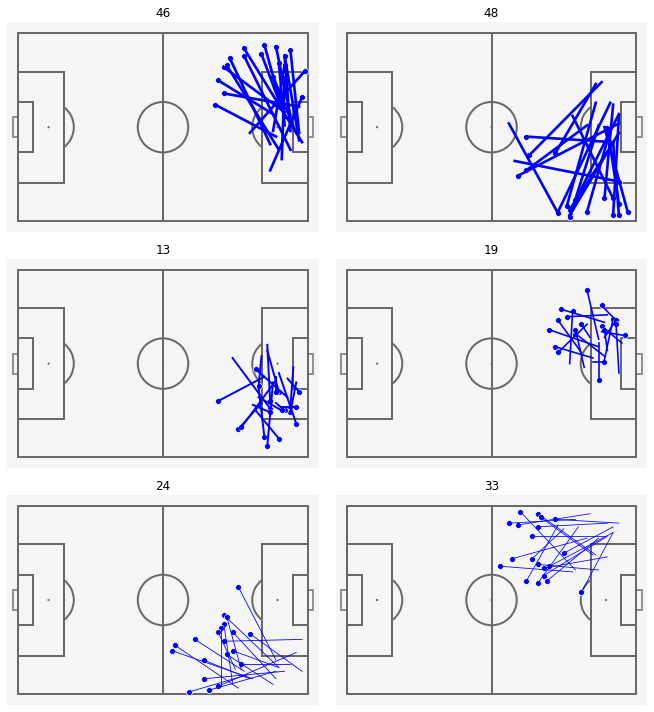

In [296]:
from mplsoccer import Pitch
pitch = Pitch(pitch_type='custom',half=False, goal_type='box', pitch_color='#f5f5f5', line_color='#696969' ,linewidth=2,pitch_length=105, pitch_width=68, constrained_layout=True)
fig, axs = pitch.draw(nrows=3, ncols=2, figsize=(10,10))
for i in range(3):
    for j in range(2):
        cluster_analysis = passes.loc[passes['clusters']==high_payoff_index[(2*i+j)]][:20]
        cluster_analysis.index = np.arange(0,20,1)
        axs[i,j].invert_yaxis()
        for k in range(len(cluster_analysis)):
                axs[i,j].plot([cluster_analysis['x1'][k],cluster_analysis['x2'][k]],[cluster_analysis['y1'][k],cluster_analysis['y2'][k]], color='blue',linewidth=clusters_analysis['Expected Payoff'][high_payoff_index[(2*i+j)]]/2)
        
        sns.scatterplot(data=cluster_analysis,x='x1',y='y1',color='blue',ax=axs[i,j])
        axs[i,j].set_title(str(high_payoff_index[(2*i+j)]))
plt.savefig('high_payoff_index.png')

## Progressive Passes

In [521]:
def distance_to_goal(x1,y1):
    # the center of the goal is at (105,34)
    dist = np.sqrt((105-x1)**2+(34-y1)**2)
    return dist

In [524]:
def is_progressive_pass(dist1,dist2):
    moved_forward =  dist1-dist2
    if moved_forward<0:
        return 0
    elif moved_forward/dist1 >0.25:
        return 1
    else:
        return 0


In [563]:
is_progressive = np.zeros(len(passes))
for i, j in enumerate(passes.index):
    if passes['x2'][j]>70:
        dist1 = distance_to_goal(passes['x1'][j],passes['y1'][j])
        dist2 = distance_to_goal(passes['x2'][j],passes['y2'][j])
        is_progressive[i] = is_progressive_pass(dist1,dist2)

In [564]:
passes['is_progressive']=is_progressive


In [565]:
progressive_passes = passes.loc[passes['is_progressive']==1]

In [608]:
X = progressive_passes[['x1','x2','y1','y2']]
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [609]:
Sum_of_squared_distances = []
K = np.arange(1,50,5)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_scaled)
    Sum_of_squared_distances.append(km.inertia_)

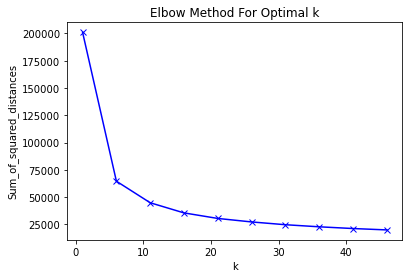

In [610]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [611]:
km = KMeans(10)
km = km.fit(X_scaled)

In [612]:
clusters = km.fit_predict(X_scaled)
progressive_passes['clusters']=clusters

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


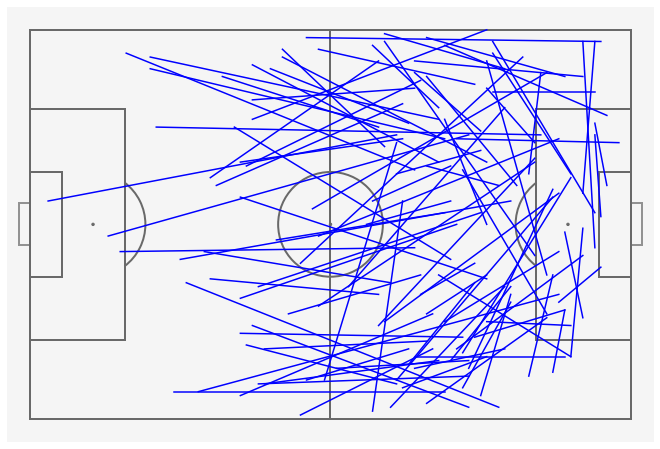

In [545]:
fig ,ax = plt.subplots(figsize=(13.5,8))
pitch = Pitch(pitch_type='custom',half=False, goal_type='box', pitch_color='#f5f5f5', line_color='#696969' , linewidth=2,pitch_length=105, pitch_width=68, constrained_layout=True)
pitch.draw(ax=ax)
for i in progressive_passes.index[:100]:
        plt.plot([progressive_passes['x1'][i],progressive_passes['x2'][i]],[progressive_passes['y1'][i],progressive_passes['y2'][i]], color='blue')
#         plt.scatter(x=messi_passes['x_coord1'][i],y=messi_passes['y_coord1'][i],color='green')
        
    

In [613]:
progressive_clusters = pd.DataFrame(progressive_passes.groupby(['clusters']).size(),columns=['count'])
progressive_clusters['pass_accuracy'] = progressive_passes.groupby(['clusters']).is_accurate.sum()*100/progressive_passes.groupby(['clusters']).size()
progressive_clusters['average_threat'] = progressive_passes.groupby(['clusters']).xTdiff.sum()/progressive_passes.groupby(['clusters']).size()

In [614]:
progressive_clusters = progressive_clusters.loc[progressive_clusters['count']>500]

In [615]:
progressive_clusters_index = progressive_clusters.index

In [617]:
progressive_clusters['payoff'] = progressive_clusters['pass_accuracy']*progressive_clusters['average_threat']

In [653]:
progressive_clusters = progressive_clusters.sort_values('clusters', ascending=True)

In [891]:
del progressive_clusters['payoff_index']

In [892]:
progressive_clusters

,count,pass_accuracy,average_threat,payoff
clusters,,,,
0,3454,54.748118,0.017909,0.980476
1,6058,47.276329,0.117691,5.564006
2,5310,70.207156,0.017768,1.247474
3,4878,62.279623,0.035718,2.224526
4,5550,54.702703,0.013607,0.744327
5,4473,59.602057,0.012993,0.774438
6,6302,47.746747,0.115587,5.518892
7,4790,65.052192,0.035272,2.294542
8,5686,69.820612,0.014724,1.028008


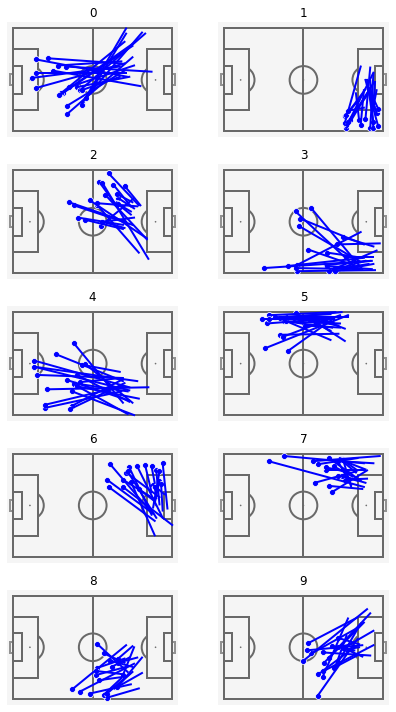

In [620]:
from mplsoccer import Pitch
pitch = Pitch(pitch_type='custom',half=False, goal_type='box', pitch_color='#f5f5f5', line_color='#696969' ,linewidth=2,pitch_length=105, pitch_width=68, constrained_layout=True)
fig, axs = pitch.draw(nrows=5, ncols=2, figsize=(10,10))
for i in range(5):
    for j in range(2):
        cluster_analysis = progressive_passes.loc[progressive_passes['clusters']==progressive_clusters_index[(2*i+j)]][:20]
        cluster_analysis.index = np.arange(0,20,1)
        axs[i,j].invert_yaxis()
        for k in range(len(cluster_analysis)):
                axs[i,j].plot([cluster_analysis['x1'][k],cluster_analysis['x2'][k]],[cluster_analysis['y1'][k],cluster_analysis['y2'][k]], color='blue',linewidth=2)
        
        sns.scatterplot(data=cluster_analysis,x='x1',y='y1',color='blue',ax=axs[i,j])
        axs[i,j].set_title(str(progressive_clusters_index[(2*i+j)]))
plt.savefig('progressive_clusters.png')

## Individual Teams Progressive Passes

In [627]:
def get_team_indices(Id):
    team_df = progressive_passes.loc[(progressive_passes['teamId']==Id)]
    team_clusters = pd.DataFrame(team_df.groupby(['clusters']).size(), columns=['count'])
    team_clusters = team_clusters.loc[team_clusters['count']>50]
    team_clusters = team_clusters.sort_values('count', ascending=False)
    team_over_index = team_clusters.head(2).index
    team_under_index = team_clusters.tail(2).index
    return  team_df,team_clusters,team_over_index , team_under_index

In [880]:
def plot_clusters(team_df,team_index):
    pitch = Pitch(pitch_type='custom',half=False, goal_type='box', pitch_color='#f5f5f5', line_color='#696969' ,linewidth=2,pitch_length=105, pitch_width=68, constrained_layout=True)
    fig, axs = pitch.draw(nrows=1, ncols=len(team_index), figsize=(15,8))
    for i in range(len(team_index)):
        cluster_analysis = team_df.loc[team_df['clusters']==team_index[i]][:20]
        cluster_analysis.index = np.arange(0,20,1)
        axs[i].invert_yaxis()
        for k in range(len(cluster_analysis)):
                axs[i].plot([cluster_analysis['x1'][k],cluster_analysis['x2'][k]],[cluster_analysis['y1'][k],cluster_analysis['y2'][k]], color='blue')
        
        sns.scatterplot(data=cluster_analysis,x='x1',y='y1',color='blue',ax=axs[i])
        axs[i].set_title(str(team_index[i]))
    

#### SPURS

In [632]:
spurs_df, spurs_clusters, spurs_over, spurs_under = get_team_indices(1624)

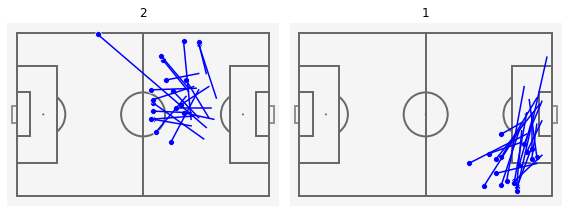

In [633]:
plot_clusters(spurs_df,spurs_over)

#### MANCHESTER CITY

In [634]:
mcity_df,mcity_clusters, mcity_over, mcity_under = get_team_indices(1625)

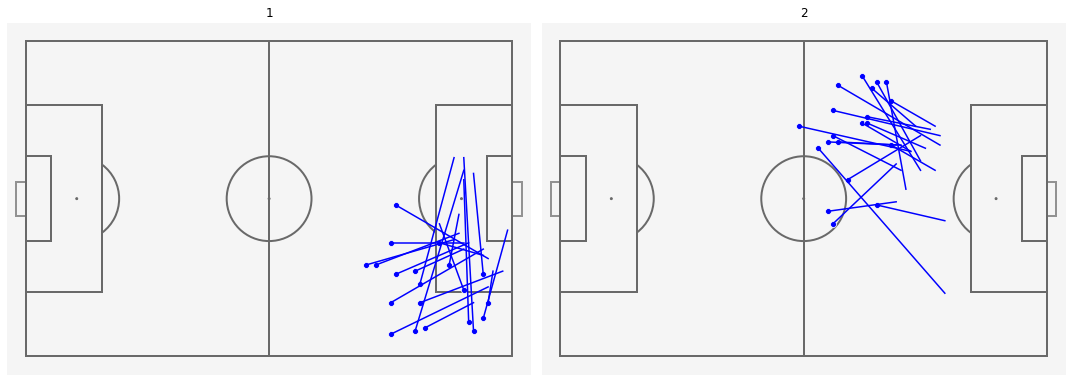

In [890]:
plot_clusters(mcity_df,mcity_over)
plt.savefig('cityprog.png')

#### CRYSTAL PALACE

In [636]:
cpalace_df,cpalace_clusters, cpalace_over, cpalace_under = get_team_indices(1628)

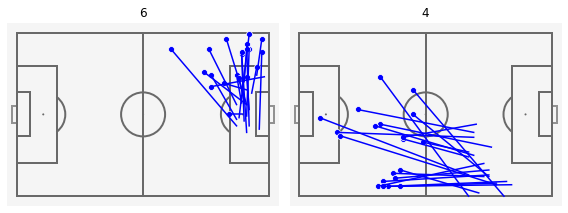

In [637]:
plot_clusters(cpalace_df,cpalace_over)

#### SOUTHAMPTON

In [638]:
shampton_df, shampton_clusters,shampton_over, shampton_under = get_team_indices(1619)

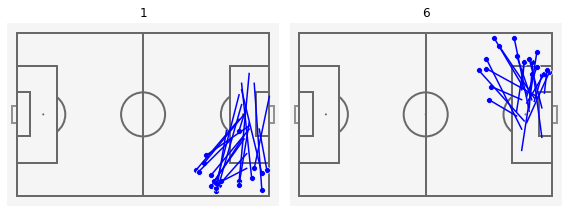

In [639]:
plot_clusters(shampton_df,shampton_over)

#### WATFORD

In [641]:
watford_df, watford_clusters,watford_over, watford_under = get_team_indices(1644)

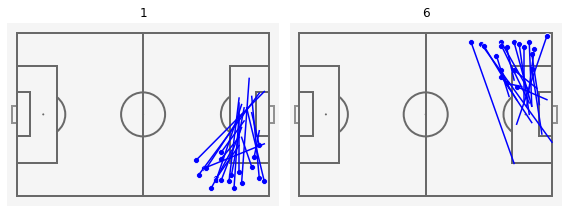

In [642]:
plot_clusters(watford_df,watford_over)

#### NEWCASTLE

In [644]:
ncastle_df, ncastle_clusters, ncastle_over, ncastle_under = get_team_indices(1613)

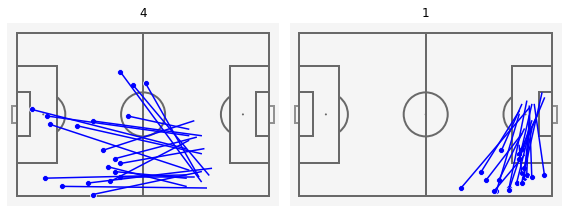

In [645]:
plot_clusters(ncastle_df, ncastle_over)

#### Burnley

In [872]:
burnley_df, burnley_clusters, burnley_over, burnley_under = get_team_indices(1646)

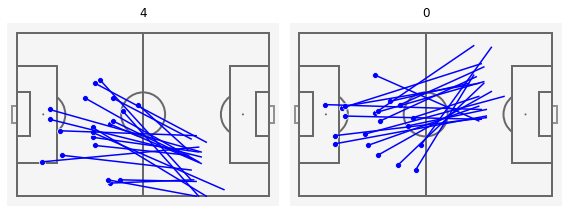

In [874]:
plot_clusters(burnley_df, burnley_over)

## Z-Score Specialization

In [666]:
team_clusters = passes.groupby(['teamId','clusters']).size().reset_index()

In [668]:
team_clusters.columns = ['teamId', 'clusters', 'count']

In [687]:
teamId = team_clusters.teamId.unique()

In [688]:
team_z = np.zeros((20,51))
team_z[:,0] = teamId

In [724]:
for i in range(50):
    array = np.asarray(team_clusters.loc[team_clusters['clusters']==i]['count'])
    team_z[:,i+1]=array
    

In [816]:
team_z_df =pd.DataFrame(team_z)

In [817]:
team_z_df = team_z_df.rename(columns={0: "teamId"})

In [818]:
team_z_df = team_z_df.astype({'teamId': 'int32'})

In [819]:
team_z_df.index = team_z_df.teamId

In [820]:
del team_z_df['teamId']

In [821]:
team_z_df = team_z_df.div(team_z_df.sum(axis=1), axis=0)

In [822]:
team_z_df = team_z_df -team_z_df.mean()

In [823]:
team_z_df = team_z_df.div(team_z_df.std(axis=0), axis=1)

In [864]:
team_z_df.columns = np.arange(0,50,1)

In [860]:
def get_team_z(teamId):
    return np.where(team_z_df.loc[teamId,:]>1.5)[0]

In [878]:
np.where(team_z_df.loc[1611,:]>1.5)[0]

array([31], dtype=int64)

#### Frequent Clusters

#### Arsenal

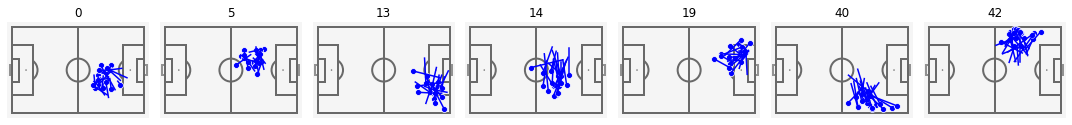

In [869]:
plot_clusters(passes.loc[passes['teamId']==1609],get_team_z(1609))

#### Manchester City

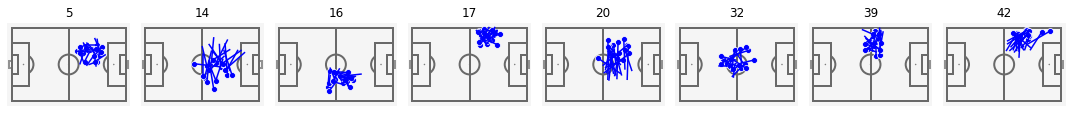

In [870]:
plot_clusters(passes.loc[passes['teamId']==1625],get_team_z(1625))

#### Burnley

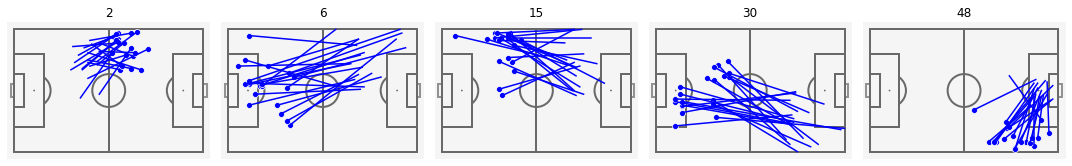

In [889]:
plot_clusters(passes.loc[passes['teamId']==1646],get_team_z(1646))
plt.savefig('Burnley_clusters.png')

#### Liverpool

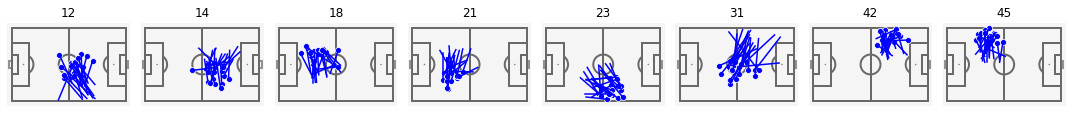

In [881]:
plot_clusters(passes.loc[passes['teamId']==1612],get_team_z(1612))

### Specialization Scores

In [887]:
specializationscores  = pd.DataFrame(team_z_df.median(axis=1), columns=['scores'])

In [888]:
specializationscores

,scores
teamId,
1609,-0.408587
1610,0.103267
1611,-0.117537
1612,-0.206648
1613,0.030612
1619,0.037451
1623,-0.138375
1624,-0.100512
1625,-0.577425
